In [2]:
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.layers import Embedding, Dense, LSTM, GRU
from keras.models import Sequential
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import string

In [3]:
categories = ['comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast']
# Prepare train and test data
data = fetch_20newsgroups(shuffle=True, subset='train', categories=categories)
test = fetch_20newsgroups(shuffle=True, subset='test', categories=categories)
news, news_topics, _classes = data.data, data.target, data.target_names

In [4]:
# Tokenize the sentences into words (2000)
nb_words = 10000
tokenizer = Tokenizer(num_words=nb_words)
tokenizer.fit_on_texts(news)
sequences = Tokenizer.texts_to_sequences(tokenizer, news)

In [5]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 55199 unique tokens.


In [6]:
max_seq_len = 1000
input_data = pad_sequences(sequences, maxlen=max_seq_len)
one_hot_labels = keras.utils.to_categorical(news_topics)

print('Shape of data tensor:', input_data.shape)
print('Shape of label tensor:', one_hot_labels.shape)

Shape of data tensor: (4059, 1000)
Shape of label tensor: (4059, 7)


In [7]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(input_data, one_hot_labels, test_size=0.2)
len(word_index)

55199

In [8]:
embedding_vector_length = 64
model = Sequential()
# add embedding layer
model.add(Embedding(len(word_index), embedding_vector_length, input_length=max_seq_len, init='glorot_normal', W_regularizer=keras.regularizers.l2(0.01)))
# add this to run without embedding layer
model.add(LSTM(100, dropout_W=0.25))
model.add(Dense(7, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\bharg\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(55199, 64, input_length=1000, embeddings_initializer="glorot_normal", embeddings_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
C:\Users\bharg\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.25)`
  import sys


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 64)          3532736   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
Total params: 3,599,443
Trainable params: 3,599,443
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
Xtrain.shape, ytrain.shape, Xvalid.shape, yvalid.shape

((3247, 1000), (3247, 7), (812, 1000), (812, 7))

In [10]:
history=model.fit(Xtrain, ytrain, epochs=20,verbose=True, validation_data=(Xvalid,yvalid), batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 3247 samples, validate on 812 samples
Epoch 1/20
3247/3247 [==============================] - 75s 23ms/step - loss: 0.5250 - accuracy: 0.8571 - val_loss: 0.4128 - val_accuracy: 0.8571
Epoch 2/20
3247/3247 [==============================] - 70s 22ms/step - loss: 0.4085 - accuracy: 0.8580 - val_loss: 0.4200 - val_accuracy: 0.8571
Epoch 3/20
3247/3247 [==============================] - 70s 22ms/step - loss: 0.4006 - accuracy: 0.8610 - val_loss: 0.3795 - val_accuracy: 0.8702
Epoch 4/20
3247/3247 [==============================] - 70s 22ms/step - loss: 0.4033 - accuracy: 0.8686 - val_loss: 0.4073 - val_accuracy: 0.8719
Epoch 5/20
3247/3247 [==============================] - 77s 24ms/step - loss: 0.3911 - accuracy: 0.8731 - val_loss: 0.3927 - val_accuracy: 0.8747
Epoch 6/20
3247/3247 [==============================] - 70s 22ms/step - loss: 0.3885 - accuracy: 0.8714 - val_loss: 0.4122 - val_accuracy: 0.8681
Epoch 7/20
3247/3247 [=======

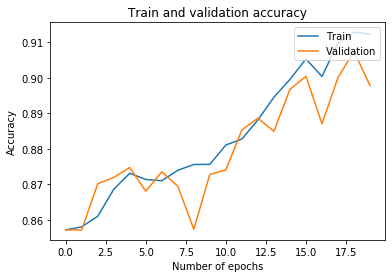

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

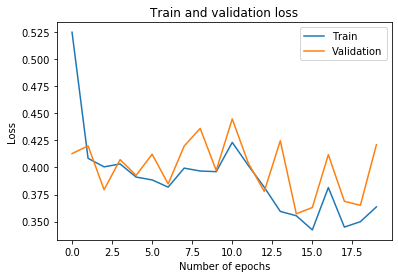

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()